In [10]:
%load_ext autoreload
%autoreload 2
# %reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from base_line import BaseLine
import matplotlib.pyplot as plt
import numpy as np

from source.read_params import read_params

Читаем параметры и передаем их в исходный класс. Параметры системы содержатся в файле params.yaml. На некоторые параметры (trend, seasonality) задаются границы и в файле read_params производится случайный выбор внутри границ. Если необходимо зафиксировать значение, нужно либо изменить это в файле read_params, либо задавать узкие границы. 

In [12]:
par1,par2,n_point,n_lev,trend,season_amp,season_fi,period = read_params("source/params.yaml")

In [13]:
t = BaseLine(params=par2, num_point=n_point, num_level=n_lev,
             trend=trend, seasonality=(season_amp,season_fi), period=period)

Выводим на график модель сезонности

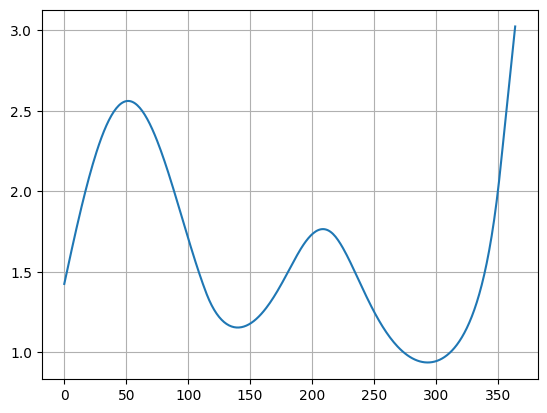

In [14]:
T = np.arange(t.period)
y = t.plot_trend()
plt.plot(T,y)
plt.grid(True)

Вывод на график текущей модели спроса и исторического спроса

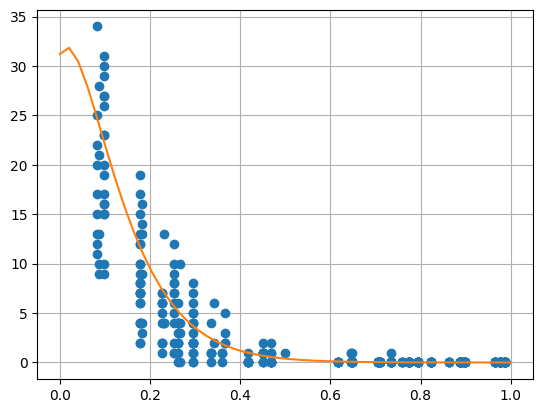

In [16]:
plt.plot(t.x, t.order,'o')
price = np.linspace(0,1)
lam = t.get_lambda(price)

plt.plot(price,lam)
plt.grid(True)